In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

# Part_1 - Importing and Filtering the data

In [ ]:
data = pd.read_csv('Gold_Stock.csv')
data

,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1
...,...,...,...,...,...,...,...
2506,2528,2014-01-28,1250.5,81426.0,1254.9,1261.9,1248.0
2507,2529,2014-01-27,1263.5,63419.0,1269.9,1280.1,1252.0
2508,2530,2014-01-24,1264.5,34998.0,1264.3,1273.2,1256.9
2509,2531,2014-01-23,1262.5,41697.0,1235.1,1267.1,1230.8


# I will only be utilizing the closing value of the stock on that specific date for simplicity as i assume it is the most important value


In [ ]:
filtered_data = data[['Date', 'Close']].iloc[::-1]
filtered_data

,Date,Close
2510,2014-01-22,1238.6
2509,2014-01-23,1262.5
2508,2014-01-24,1264.5
2507,2014-01-27,1263.5
2506,2014-01-28,1250.5
...,...,...
4,2024-01-12,2051.6
3,2024-01-16,2030.2
2,2024-01-17,2006.5
1,2024-01-18,2021.6


# I will:
1- Make my Date column the data index

2- change the dtype of Date from string to datetime

3- Remove any duplicates as indeceis should be unique

In [ ]:
filtered_data.index = filtered_data.pop('Date')                                  # Make Date Column The DF index
filtered_data.index = pd.to_datetime(filtered_data.index)                        # Change Date dtype to datetime
filtered_data = filtered_data[~filtered_data.index.duplicated(keep='first')]     # Drop duplicate dates from the index
filtered_data


,Close
Date,
2014-01-22,1238.6
2014-01-23,1262.5
2014-01-24,1264.5
2014-01-27,1263.5
2014-01-28,1250.5
...,...
2024-01-12,2051.6
2024-01-16,2030.2
2024-01-17,2006.5


printing the Index to check the dtype

In [ ]:
filtered_data.index

DatetimeIndex(['2014-01-22', '2014-01-23', '2014-01-24', '2014-01-27',
               '2014-01-28', '2014-01-29', '2014-01-30', '2014-01-31',
               '2014-02-03', '2014-02-04',
               ...
               '2024-01-05', '2024-01-08', '2024-01-09', '2024-01-10',
               '2024-01-11', '2024-01-12', '2024-01-16', '2024-01-17',
               '2024-01-18', '2024-01-19'],
              dtype='datetime64[ns]', name='Date', length=2493, freq=None)

# Let's plot the data

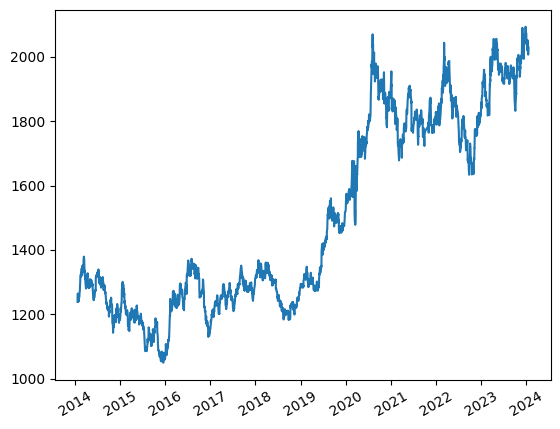

In [ ]:
plt.plot(filtered_data.index, filtered_data['Close'])

# Rotate x-axis labels for better readability
plt.xticks(rotation=30)

plt.show()

# Part_2 - Preparing Data for the model


In [ ]:
import pandas as pd
import numpy as np
import datetime

def df_to_windowed_df(df, first_date_str, last_date_str, n):
    first_date = pd.to_datetime(first_date_str)
    last_date = pd.to_datetime(last_date_str)

    target_date = first_date
    dates = []
    X, Y = [], []

    while target_date <= last_date:
        # Check if the target date is in the index
        if target_date not in df.index:
            # If the target date is missing, move to the next date
            target_date += datetime.timedelta(days=1)
            continue

        # Get the subset of the DataFrame up to the target date
        df_subset = df.loc[:target_date].tail(n + 1)

        # Check if the subset has enough data points
        if len(df_subset) != n + 1:
            print(f'{n} is too large for {target_date}, Function will adapt and change start_date')
            target_date += datetime.timedelta(days=1)
            continue

        # Extract the values for X and Y
        values = df_subset['Close'].to_numpy()
        x, y = values[:-1], values[-1]

        # Append the data to the lists
        dates.append(target_date)
        X.append(x)
        Y.append(y)

        # Move to the next date
        target_date += datetime.timedelta(days=1)

    # Create a DataFrame from the collected data
    ret_df = pd.DataFrame({'Target Date': dates})
    for i in range(0, n):
        ret_df[f'Target-{n-i}'] = np.array(X)[:, i]
    ret_df['Target'] = Y

    return ret_df




In [ ]:
# 3 --> '2014-01-27'
# 4 --> '2014-01-28'

previous_values = 5
windowed_df = df_to_windowed_df(
                                filtered_data,
                                '2014-01-29',
                                '2024-01-19',
                                previous_values)
windowed_df

,Target Date,Target-5,Target-4,Target-3,Target-2,Target-1,Target
0,2014-01-29,1238.6,1262.5,1264.5,1263.5,1250.5,1262.2
1,2014-01-30,1262.5,1264.5,1263.5,1250.5,1262.2,1242.5
2,2014-01-31,1264.5,1263.5,1250.5,1262.2,1242.5,1239.8
3,2014-02-03,1263.5,1250.5,1262.2,1242.5,1239.8,1259.9
4,2014-02-04,1250.5,1262.2,1242.5,1239.8,1259.9,1251.2
...,...,...,...,...,...,...,...
2483,2024-01-12,2049.8,2033.5,2033.0,2027.8,2019.2,2051.6
2484,2024-01-16,2033.5,2033.0,2027.8,2019.2,2051.6,2030.2
2485,2024-01-17,2033.0,2027.8,2019.2,2051.6,2030.2,2006.5
2486,2024-01-18,2027.8,2019.2,2051.6,2030.2,2006.5,2021.6


In [ ]:
def windowed_df_to_dates_x_y(my_windowed_df):

  df = my_windowed_df.to_numpy()                                                # convert the df into a numpy array

  dates = df[:, 0]                                                              # Dates are the Target Date column

  x = df[:, 1:-1]                                                               # [x] is the input matrix for our model... the [previous_values] previous values for each target
  x = x.reshape(len(dates), x.shape[1], 1)

  y = df[:, -1]                                                                 # [y] is the output vector that our model should predict

  return dates, x.astype(np.float32), y.astype(np.float32)

dates, x, y = windowed_df_to_dates_x_y(windowed_df)

In [ ]:
dates.shape, x.shape, y.shape

((2488,), (2488, 5, 1), (2488,))

# Now I will split the data in training[80%], validation[10%] and testing[10%]

In [ ]:
n_80 = int(len(dates)*0.8)
n_90 = int(len(dates)*0.9)

# Training Data
dates_train = dates[:n_80]
x_train = x[:n_80]
y_train = y[:n_80]

# Validation Data
dates_validate = dates[n_80:n_90]
x_validate = x[n_80:n_90]
y_validate = y[n_80:n_90]

# Testing Data
dates_test = dates[n_90:]
x_test = x[n_90:]
y_test = y[n_90:]


plt.plot(dates_train, y_train)
plt.plot(dates_validate, y_validate)
plt.plot(dates_test, y_test)


# The model will:

1- Train using the Blue data

2- Validate using the Orange date

3- Be tested on the Green data

# Part_3 - Building The Model

# I will create a sequential model built up of many layers

# The greater the number of neurons for the LSTM

1- more complicated model

2- prone to over fitting

3- considered heavy duty

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

my_model = Sequential([
                   layers.Input((previous_values, 1)),                          # previous_values -> number of days before, 1 -> nummber of variables
                   layers.LSTM(100),                                            # Number of neurons for the LSTM
                   layers.Dense(100, activation='relu'),                        # Activation function default = 'Linear'
                   layers.Dense(100, activation='relu'),
                   layers.Dense(1)
                   ])

my_model.compile(
                 loss='mse',
                 optimizer = Adam(learning_rate=0.001),
                 metrics = ['mean_absolute_error']
                 )

my_model.fit(
             x_train,
             y_train,
             validation_data=(x_validate, y_validate),
             epochs=100
             )


# Graphing The Predicted Training Data

In [ ]:
train_predictions = my_model.predict(x_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])


# Graphing The Predicted Validation Data

In [ ]:
valedate_predictions = my_model.predict(x_validate).flatten()

plt.plot(dates_validate, valedate_predictions)
plt.plot(dates_validate, y_validate)
plt.legend(['Validation Predictions', 'Validation Observations'])

# Graphing The Predicted Testing Data

In [ ]:
test_predictions = my_model.predict(x_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

# Graphing The Full Predicted Data

In [ ]:
train_predictions = my_model.predict(x_train).flatten()
valedate_predictions = my_model.predict(x_validate).flatten()
test_predictions = my_model.predict(x_test).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)

plt.plot(dates_validate, valedate_predictions)
plt.plot(dates_validate, y_validate)

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)

plt.legend(['Training Predictions', 'Training Observations','Validation Predictions', 'Validation Observations','Testing Predictions', 'Testing Observations'])

# Evaluation Metrics

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, test_predictions)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, test_predictions)

print(f'Mean Squared Error = {mse}\nMean Absolute Error = {mae}')

Mean Squared Error = 9972.5732421875
Mean Absolute Error = 91.30189514160156
